## 1. Segmentation

### 1.2. Normalized Graph-Cut and Mean-Shift Segmentation

#### 1.2.1. Normalized Graph-Cut Segmentation

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import segmentation, color, future

In [2]:
# Read home image (in RGB)
img = cv2.cvtColor(cv2.imread('./images/home.jpg'), cv2.COLOR_BGR2RGB)

In [3]:
def plotFigures(images, size=5):
    """
    :param images: List of images to display
    """
    
    plt.figure(figsize=(15, 15))
    for i, image in enumerate(images, 1):
        plt.subplot(size, size, i), plt.imshow(image['image'])
        plt.title(image['title']), plt.axis('off')
    plt.show()

In [4]:
def graphCutSegmentation(img, comp, seg, thresh):
    """
    :param img: Image to use for segmentation
    :param comp: Balance between color and space proximity
    :param seg: Number of labels in segmented image
    :param thresh: Threshold value
    :return:
    """

    labels = segmentation.slic(img, n_segments=seg, compactness=comp)
    rag = future.graph.rag_mean_color(img, labels, mode='similarity')
    labels = future.graph.cut_normalized(labels, rag, thresh)
    image = color.label2rgb(labels, img, kind='avg')

    return {
        'image': image,
        'title': 'Normalized Graph Cut\nCompactness {}\nNumber of Segments {}\nThreshold {}'.format(comp, seg, thresh),
    }

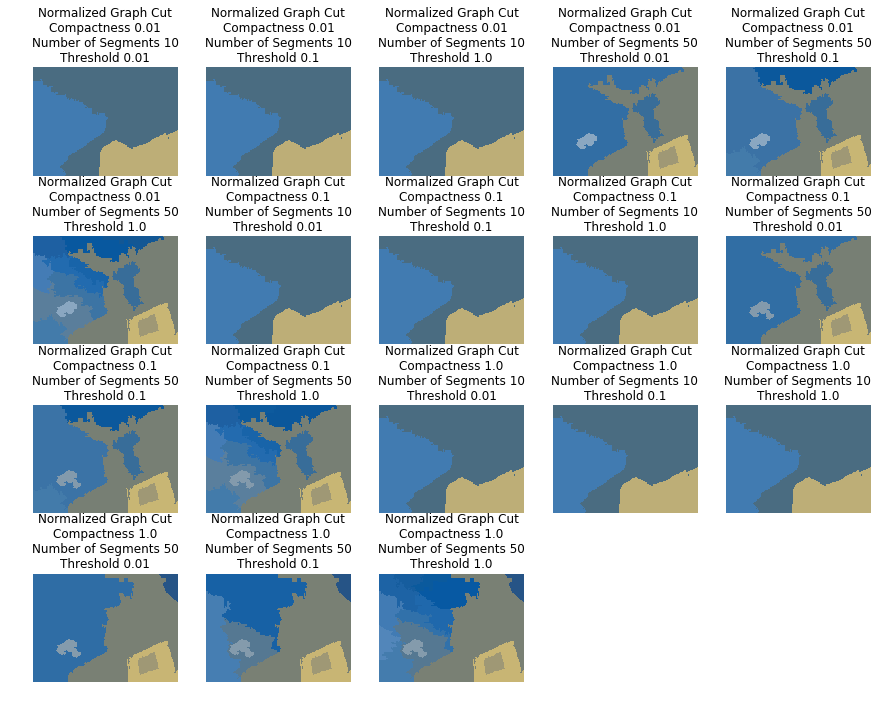

In [5]:
compactness = [0.01, 0.1, 1.0]
segments = [10, 50]
threshold = [0.01, 0.1, 1.0]

images = []
for c in compactness:
    for s in segments:
        for t in threshold:
            images.append(graphCutSegmentation(img, c, s, t))

plotFigures(images)

When we increase the compactness the shape of the segments tend towards a square by trading off color for space. On the other hand, increasing the number of segments improves the resolution of the resulting image, although while taking much more time to compute. Finally, if we increase the threshold, the number of subdivisions in the graph also increases.

#### 1.2.2. Mean-Shift Segmentation

In [6]:
def meanShiftSegmentation(img, ratio, ksize, dist):
    """
    :param img: Image to use for segmentation
    :param ratio: Balance between color and space proximity
    :param kernel_size: Size of Gaussian kernel used in smoothing
    :param dist: Cut-off point for data distances
    """

    labels = segmentation.quickshift(img, ratio=ratio, kernel_size=ksize, max_dist=dist)
    image = color.label2rgb(labels, img, kind='avg')

    return {
        'image': image,
        'title': 'Mean Shift\nRatio {}\nKernel Size {}\nMax Distance {}'.format(ratio, ksize, dist)
    }

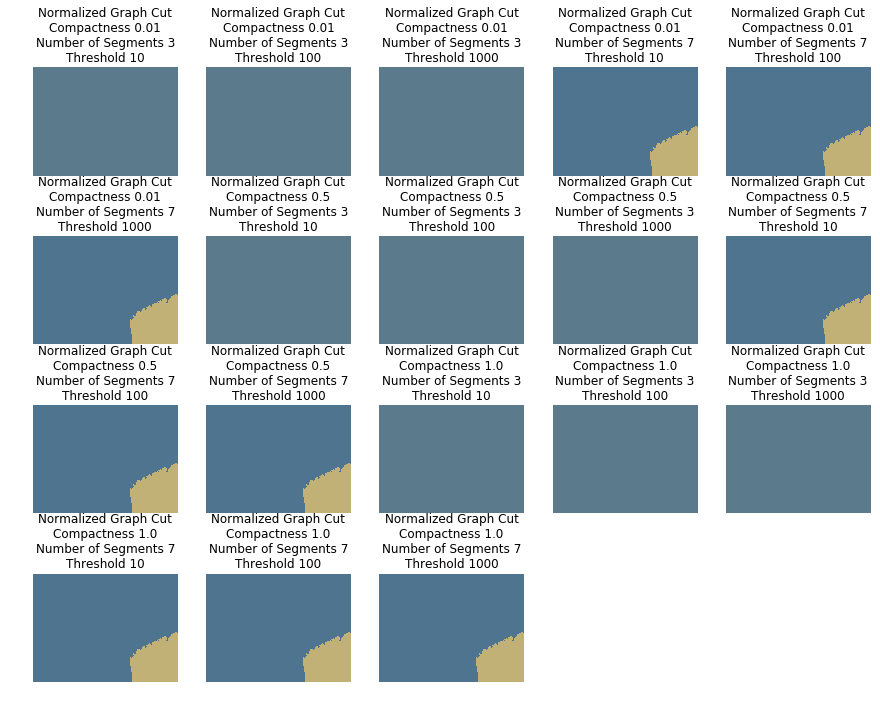

In [8]:
ratio = [0.01, 0.5, 1.0]
ksize = [3, 7]
distance = [10, 100, 1000]

images = []
for r in ratio:
    for k in ksize:
        for d in distance:
            images.append(graphCutSegmentation(img, r, k , d))

plotFigures(images)

Increasing the ratio seems to improve the precision of the computed clusters. A higher Gaussian kernel size will result in a smoother resulting image, and as a result fewer total clusters. Lastly, the maximum distance sets the cut-off between individual clusters, with higher values resulting in lest clusters.